## UK Covid Data
Data from gov.uk https://coronavirus.data.gov.uk/ .
Updated on May 9th.

by Leo Nabil

In [261]:
# Using Pandas for data analysis.
import pandas as pd
# readin files
fileCases = "../covid/coronavirus-cases_latest.csv"
fileDeaths = "../covid/coronavirus-deaths_latest.csv"
covidCases = pd.read_csv(fileCases)
covidDeaths = pd.read_csv(fileDeaths)
# Removing spaces in columsn
covidCases.columns = covidCases.columns.str.replace(' ', '_')
covidCases.columns = covidCases.columns.str.replace('-', '_')
covidDeaths.columns = covidDeaths.columns.str.replace(' ', '_')
# Setting date format
covidCases = covidCases.assign(Specimen_date = pd.to_datetime(covidCases.Specimen_date))
covidDeaths = covidDeaths.assign(Reporting_date = pd.to_datetime(covidDeaths.Reporting_date))

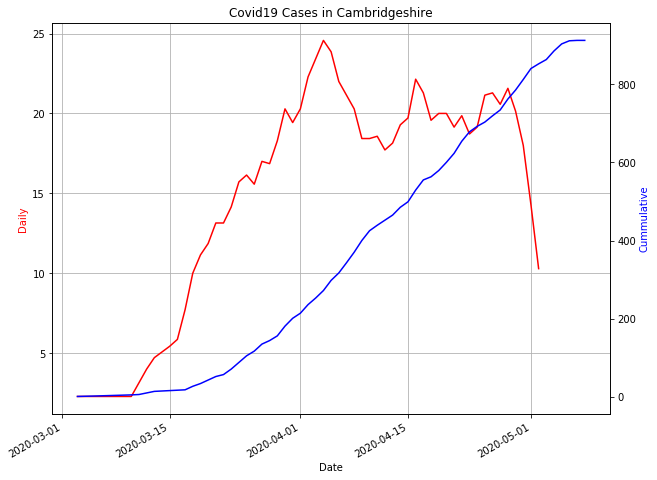

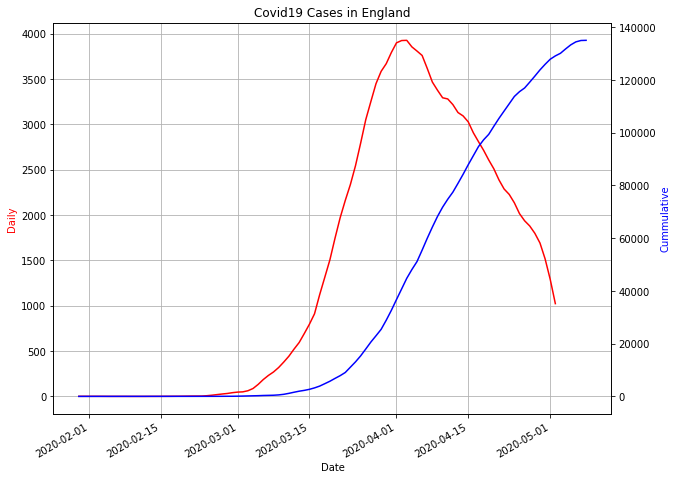

In [360]:
# Plotting by AreaName
import matplotlib.pyplot as plt

# Funtion to plot data
def funplotting(region):
    fig, ax1 = plt.subplots(figsize=(10,8))
    averageWin = 7
    ax2 = ax1.twinx()
    _ = ax1.plot(
        covidCases[covidCases.Area_name==region].Specimen_date.dt.date,
        covidCases[covidCases.Area_name==region].Daily_lab_confirmed_cases.rolling(averageWin).mean(),
        label='Daily', color='red')
    _ = ax2.plot(
        covidCases[covidCases.Area_name==region].Specimen_date.dt.date,
        covidCases[covidCases.Area_name==region].Cumulative_lab_confirmed_cases,
        label='Cummulative', color='blue')
    _ = ax1.set_ylabel('Daily', color='red')
    _ = ax2.set_ylabel('Cummulative', color='blue')
    _ = ax1.set_xlabel('Date')
    _ = ax1.grid()
    _ = ax1.set_title(f'Covid19 Cases in {region}')
    fig.autofmt_xdate()
    return()

region='Cambridgeshire'
_ = funplotting(region)
region='England'
_ = funplotting(region)

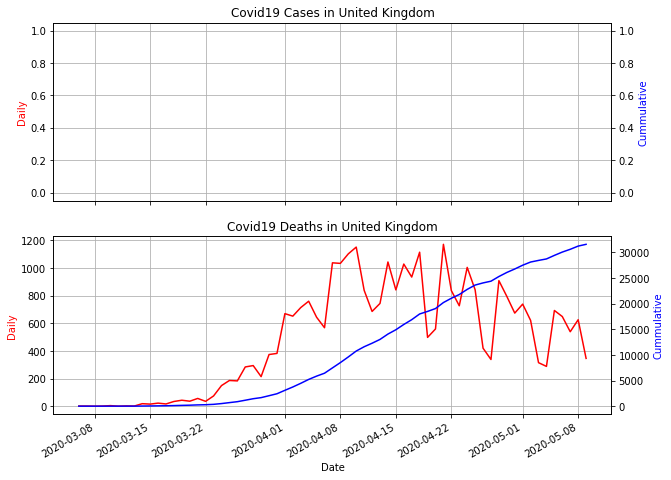

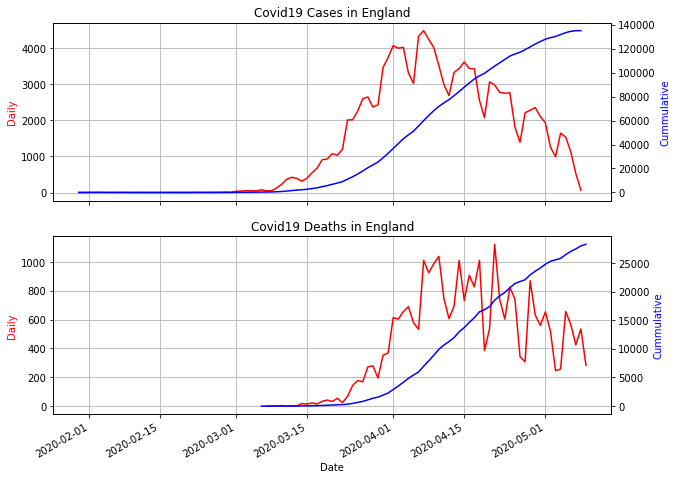

In [369]:
# Plotting by AreaName
import matplotlib.pyplot as plt

# Funtion to plot data
def funplotting(region):
    fig, (ax1, ax3)= plt.subplots(2,1, sharex = True, figsize=(10,8))
    ax2 = ax1.twinx()
    ax4 = ax3.twinx()
    averageWin = 1
    # Cases
    _ = ax1.plot(
        covidCases[covidCases.Area_name==region].Specimen_date.dt.date,
        covidCases[covidCases.Area_name==region].Daily_lab_confirmed_cases.rolling(averageWin, center=True).mean(),
        label='Daily', color='red')
    _ = ax2.plot(
        covidCases[covidCases.Area_name==region].Specimen_date.dt.date,
        covidCases[covidCases.Area_name==region].Cumulative_lab_confirmed_cases,
        label='Cummulative', color='blue')
    _ = ax1.set_ylabel('Daily', color='red')
    _ = ax2.set_ylabel('Cummulative', color='blue')
    _ = ax1.set_xlabel('Date')
    _ = ax1.grid()
    _ = ax1.set_title(f'Covid19 Cases in {region}')
    # Deaths
    _ = ax3.plot(
        covidDeaths[covidDeaths.Area_name==region].Reporting_date.dt.date,
        covidDeaths[covidDeaths.Area_name==region].Daily_change_in_deaths.rolling(averageWin, center=True).mean(),
        label='Daily', color='red')
    _ = ax4.plot(
        covidDeaths[covidDeaths.Area_name==region].Reporting_date.dt.date,
        covidDeaths[covidDeaths.Area_name==region].Cumulative_deaths,
        label='Cummulative', color='blue')
    _ = ax3.set_ylabel('Daily', color='red')
    _ = ax4.set_ylabel('Cummulative', color='blue')
    _ = ax3.set_xlabel('Date')
    _ = ax3.grid()
    _ = ax3.set_title(f'Covid19 Deaths in {region}')
    fig.autofmt_xdate()
    return()

region='United Kingdom'
_ = funplotting(region)
region='England'
_ = funplotting(region)

## Todos
- Get UK national
- Get an option to show the possible aggregation levels
- Read data automatically